In [14]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt 

# evaluate extra trees algorithm for classification
from numpy import mean
from numpy import std

# from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
# from sklearn.metrics import plot_confusion_matrix

from imblearn.over_sampling import SMOTE

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [15]:
def get_normalize_data(data, scaled = 'min_max'):
    # NORMALIZANDO OS DADOS 
    normalize_data = pd.DataFrame()
    if scaled == 'max':
        for column in data.columns: 
            normalize_data[column] = data[column]  / data[column].abs().max() 
    else:    
        for column in data.columns: 
            normalize_data[column] = (data[column] - data[column].min()) / (data[column].max() - data[column].min())     
    return normalize_data

def split_train_data(data, predictive_label, apply_smote = True):

    X = data.drop("conformity_class", axis=1)
    y = data[predictive_label]
    
    if apply_smote:
        # SMOTE
        smote = SMOTE(random_state=32)
        X, y = smote.fit_resample(X, y)


    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.30, random_state=999
    )
    
    return X_train, X_test, y_train, y_test
    
def model_report_performance(X, y):
    # define the model
    model = ExtraTreesClassifier()
    
    # evaluate the model
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
   
    # report performance
    print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
    
def get_confusion_matrix(y_test, y_pred, classifier):
    cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
    color = 'white'
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
    disp.plot()
    plt.show()

In [16]:
predictive_label = "conformity_class"

In [17]:
# Visualize the proportion of borrowers
load_data = pd.read_csv("data\synthetic_conformity_data.csv")

load_data["conformity_class"] = np.where(
    load_data["conformity_class"] == "conforming", 1, 0
)

Accuracy: 0.837 (0.033)


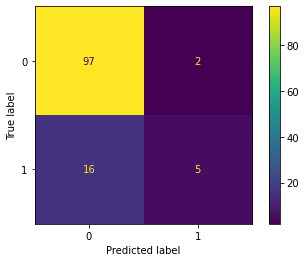

              precision    recall  f1-score   support

           0       0.86      0.98      0.92        99
           1       0.71      0.24      0.36        21

    accuracy                           0.85       120
   macro avg       0.79      0.61      0.64       120
weighted avg       0.83      0.85      0.82       120



In [18]:
# TESTE 1: Dados sinteticos
X_train, X_test, y_train, y_test = split_train_data(load_data, predictive_label, apply_smote = False)

model_report_performance(X_train, y_train)

# fit the model on the whole dataset
classifier = ExtraTreesClassifier()
classifier.fit(X_train.values, y_train.values)

# test model
y_pred  = classifier.predict(X_test.values)

# confusion_matrix
get_confusion_matrix(y_test, y_pred, classifier)
print(classification_report(y_test, y_pred))

Accuracy: 0.932 (0.034)


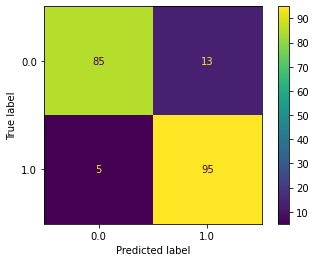

              precision    recall  f1-score   support

         0.0       0.94      0.87      0.90        98
         1.0       0.88      0.95      0.91       100

    accuracy                           0.91       198
   macro avg       0.91      0.91      0.91       198
weighted avg       0.91      0.91      0.91       198



In [19]:
# TESTE 2: Normalize and SMOTE data

df_min_max_scaled = get_normalize_data(load_data)

X_train, X_test, y_train, y_test = split_train_data(df_min_max_scaled, predictive_label)

model_report_performance(X_train, y_train)

# fit the model on the whole dataset
classifier = ExtraTreesClassifier()
classifier.fit(X_train.values, y_train.values)

# test model
y_pred  = classifier.predict(X_test.values)

# confusion_matrix
get_confusion_matrix(y_test, y_pred, classifier)
print(classification_report(y_test, y_pred))

Accuracy: 0.931 (0.036)


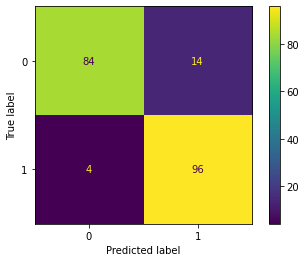

              precision    recall  f1-score   support

           0       0.95      0.86      0.90        98
           1       0.87      0.96      0.91       100

    accuracy                           0.91       198
   macro avg       0.91      0.91      0.91       198
weighted avg       0.91      0.91      0.91       198



In [20]:
# TESTE 3: SMOTE data
X_train, X_test, y_train, y_test = split_train_data(load_data, predictive_label)

model_report_performance(X_train, y_train)

# fit the model on the whole dataset
classifier = ExtraTreesClassifier()
classifier.fit(X_train.values, y_train.values)

# test model
y_pred  = classifier.predict(X_test.values)

# confusion_matrix
get_confusion_matrix(y_test, y_pred, classifier)
print(classification_report(y_test, y_pred))

In [21]:
# Save the model to disk
filename = 'water_quality_classifier.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [22]:
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9090909090909091


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  warnings.warn(
